# Pooling Layer

In [2]:
import numpy as np
import tensorflow as tf

# Feature Map (입력 이미지)
# Convolution Layer의 결과값이므로 4차원 데이터
# (이미지 개수, 이미지 height, 이미지 width, feature map의 channel의 개수(=filter의 개수))
# (1, 4, 4, 1)

image = np.array([[[[13],[20],[30],[0]],
                  [[8],[12],[3],[0]],
                  [[34],[70],[33],[5]],
                  [[111],[80],[10],[23]]]], dtype=np.float32)

print(image.shape) # (1, 4, 4, 1): 16칸

# ksize = 2 (가로:2, 세로:2)
# stride = 2
pooling = tf.nn.max_pool(image,
                         ksize=[1,2,2,1], # 4차원 (맨 끝 두개의 값은 더미 데이터)
                         strides=[1,2,2,1],
                         padding='VALID')

# tensor node
sess = tf.Session()
result = sess.run(pooling)
print('Pooling한 결과: \n{}'.format(result))
print(result.shape) # (1, 2, 2, 1): 4칸

(1, 4, 4, 1)
Pooling한 결과: 
[[[[ 20.]
   [ 30.]]

  [[111.]
   [ 33.]]]]
(1, 2, 2, 1)


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# 실제 이미지
Gray-scale 이미지를 이용해서 Convolution 연산과 Pooling 처리를 해보자.

(429, 640, 3)


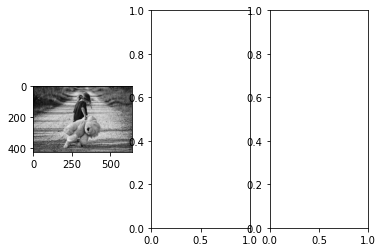

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt # 이미지 출력용
import matplotlib.image as img  # 이미지 파일 데이터 -> 3차원 형태의 넘파이 배열

fig = plt.figure()
fig_1 = fig.add_subplot(1,3,1) # original
fig_2 = fig.add_subplot(1,3,2) # convolution
fig_3 = fig.add_subplot(1,3,3) # pooling

original_img = img.imread('girl-teddy.jpg')
fig_1.imshow(original_img)
print(original_img.shape) # (429, 640, 3)

## Convolution 
Feature Map을 활성화 함수 ReLU를 통해 Activation Map으로 변환하는 과정은 제외한다.
* Convolution 처리 시, 기본적으로 4차원 형태의 데이터로 표현해야 한다.
* Convolution 처리 시, 모든 이미지의 사이즈는 동일해야 한다.

(1, 429, 640, 3)
(1, 429, 640, 1)
(1, 427, 638, 1)
(427, 638, 1)


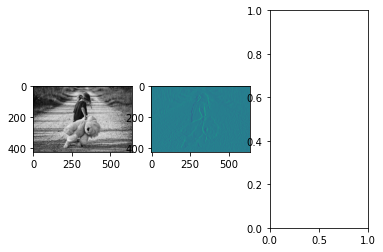

In [5]:
# 4차원: (이미지 개수, height, width, color channel)
input_image = original_img.reshape((1,) + original_img.shape)
print(input_image.shape) # (1, 429, 640, 3)

# 흑백 이미지의 channel 수 변경
channel_1_input_image = input_image[:,:,:,0:1]
channel_1_input_image = channel_1_input_image.astype(np.float32)
print(channel_1_input_image.shape) # (1, 429, 640, 1)

# filter: (filter height, filter width, filter channel, filter 개수)
# (3, 3, 1, 1)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]], dtype=np.float32)

# stride: 1
# padding: VALID
sess = tf.Session()
conv2d = tf.nn.conv2d(channel_1_input_image, weight, 
                      strides=[1,1,1,1], padding='VALID')
conv2d_result = sess.run(conv2d)
print(conv2d_result.shape) # (1, 427, 638, 1: 필터 1개), 2 pixel 씩 줄어듦

# 3차원으로 변경
t_img = conv2d_result[0,:,:,:]
print(t_img.shape) # (427, 638, 1)

# 이미지 출력
fig = plt.figure()
fig_1 = fig.add_subplot(1,3,1) # original
fig_2 = fig.add_subplot(1,3,2) # convolution
fig_3 = fig.add_subplot(1,3,3) # pooling
fig_1.imshow(original_img)

fig_2.imshow(t_img)

## MAX_Pooling

(1, 142, 212, 1)
(142, 212, 1)


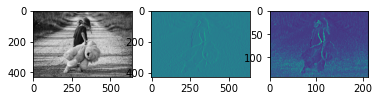

In [6]:
# ksize = 3
# stride = 3

pooling = tf.nn.max_pool(conv2d_result,  # Convolution 처리한 결과 (4차원)
                         ksize=[1,3,3,1],
                         strides=[1,3,3,1],
                         padding='VALID')
pooling_result = sess.run(pooling) # numpy array
print(pooling_result.shape) # (1, 142, 212, 1), 이미지 사이즈 줄어듦

# 3차원으로 변경
p_img = pooling_result[0,:,:,:]
print(p_img.shape) # (142, 212, 1)

# 이미지 출력
fig = plt.figure()
fig_1 = fig.add_subplot(1,3,1) # original
fig_2 = fig.add_subplot(1,3,2) # convolution
fig_3 = fig.add_subplot(1,3,3) # pooling
fig_1.imshow(original_img)
fig_2.imshow(t_img)

fig_3.imshow(p_img)
plt.show() # 이미지 형태 유지하고 이미지 사이즈가 줄고 윤곽선(특징)이 뚜렷해짐